IMPORT STATEMENTS

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statistics import mean
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

from sklearn.metrics import classification_report

IMPORT DATASET

In [8]:
datasets = pd.read_csv('Social_Network_Ads.csv')
datasets.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Confusion Matrix

[[59  4]
 [ 1 16]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


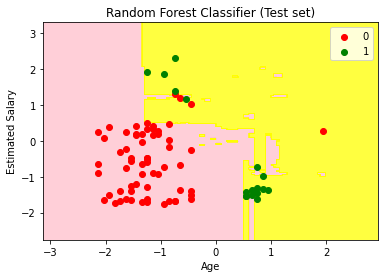

Confusion Matrix

[[73  1]
 [ 1  5]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


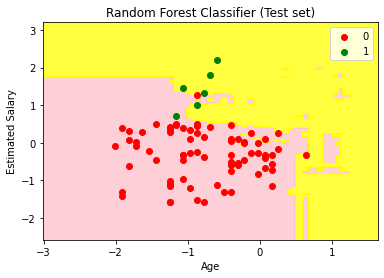

Confusion Matrix

[[48 10]
 [ 4 18]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


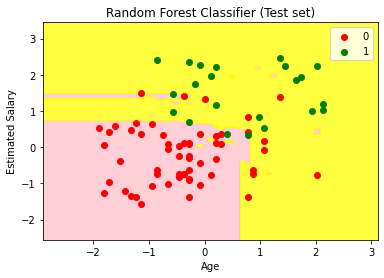

Confusion Matrix

[[28  5]
 [ 8 39]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


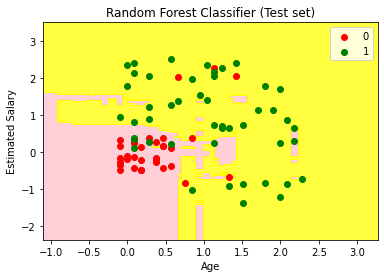

Confusion Matrix

[[27  2]
 [ 5 46]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


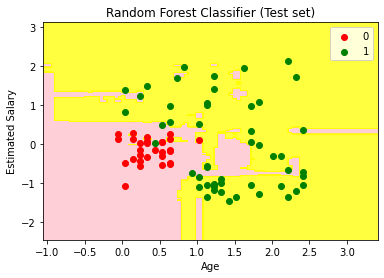

Avg F1-score for 5-folds:  0.8993357560849381


In [9]:
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

kf = KFold(n_splits = 5)
f1score = []
for train_index , test_index in kf.split(X):
    X_Train,X_Test = X[train_index],X[test_index]
    Y_Train,Y_Test = Y[train_index],Y[test_index]
    
    #Feature Scaling
    sc_X = StandardScaler()
    X_Train = sc_X.fit_transform(X_Train)
    X_Test = sc_X.transform(X_Test)
    
    #Fitting the classifier into the training set
    classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
    classifier.fit(X_Train,Y_Train)
    
    #predicting the test set results
    Y_Pred = classifier.predict(X_Test)
    
    #Making the confusion matrix
    print("Confusion Matrix\n")
    cm = confusion_matrix(Y_Test, Y_Pred)
    print(cm)
    
    X_Set, Y_Set = X_Test, Y_Test
    
    #Plotting
    X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))


    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('pink', 'yellow')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Random Forest Classifier (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()
    
    var = classification_report(Y_Test,Y_Pred,output_dict=True)['weighted avg']['f1-score']
    f1score.append(var)
print("Avg F1-score for 5-folds: ",mean(f1score))